In [238]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pyarrow.parquet as pq

In [239]:
df_csv = pd.concat(
    map(pd.read_csv, [r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20101.csv',
                      r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20102.csv',
                      r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20111.csv',
                      r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20112.csv',
                      r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20121.csv',
                      r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20122.csv',
                      r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20131.csv',
                      r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20132.csv',
                      r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20141.csv',
                      r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20142.csv',
                      r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20151.csv',
                      r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20152.csv',
                      r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20161.csv',
                      r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20162.csv',
                      r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20171.csv',
                      r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20172.csv',
                      r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20181.csv',
                      r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20182.csv',
                      r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20191.csv',
                      r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20192.csv',
                      r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\emprestimos-20201.csv' ]), ignore_index=True)

In [240]:
df_csv.shape

(2258018, 7)

In [241]:
df_csv.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO


In [242]:
df_parquet = pd.read_parquet(r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\dados_exemplares.parquet')

In [243]:
df_parquet.head()

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15


In [244]:
df = pd.merge(df_csv,df_parquet, on = 'codigo_barras')
df.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
1,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
2,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
3,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
4,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009


In [245]:
df.shape

(2072558, 13)

In [246]:
df.dtypes

id_emprestimo             int64
codigo_barras            object
data_renovacao           object
data_emprestimo          object
data_devolucao           object
matricula_ou_siape      float64
tipo_vinculo_usuario     object
id_exemplar               int64
colecao                  object
biblioteca               object
status_material          object
localizacao               int64
registro_sistema          int64
dtype: object

In [247]:
df.isnull().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1162088
data_emprestimo               0
data_devolucao             6178
matricula_ou_siape         2893
tipo_vinculo_usuario          0
id_exemplar                   0
colecao                       0
biblioteca                    0
status_material               0
localizacao                   0
registro_sistema              0
dtype: int64

In [248]:
df['matricula_ou_siape'] = df['matricula_ou_siape'].astype('string')

In [249]:
df.shape

(2072558, 13)

In [250]:
# inplace = true modifica o dataframe original, inplace = false é padrão, cria uma cópia do dataframe modificado, mantendo o dataframe original intacto
df.drop_duplicates(keep='first', inplace=True)
df.shape

(2072522, 13)

In [251]:
df.dropna()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
2,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
6,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
7,750168,L167050,2010/04/20 08:40:47.151000000,2010/04/06 09:43:02.740000000,2010/05/05 18:33:53.974000000,200719882.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
12,807187,L167050,2010/08/17 16:27:04.236000000,2010/08/02 17:52:51.879000000,2010/09/01 17:43:52.000000000,2008023699.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
13,828113,L167050,2010/09/16 19:27:32.356000000,2010/09/01 17:44:20.182000000,2010/10/11 16:39:50.000000000,2009053923.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072532,2988739,2016000708,2020/04/17 22:49:24.993000000,2020/03/17 15:22:53.701000000,2021/04/19 13:54:01.000000000,20192014521.0,ALUNO DE PÓS-GRADUAÇÃO,1237017,Acervo Circulante,Biblioteca Setorial Profª. Maria José Mamede G...,REGULAR,569,234061
2072538,2988811,2015033958,2020/04/26 11:43:40.087000000,2020/03/17 16:20:01.906000000,2021/06/09 12:33:33.000000000,20161034609.0,ALUNO DE PÓS-GRADUAÇÃO,1211606,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,541,227626
2072539,2988812,2016019436,2020/04/26 11:43:40.062000000,2020/03/17 16:20:01.992000000,2021/06/09 12:33:39.000000000,20161034609.0,ALUNO DE PÓS-GRADUAÇÃO,1235460,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,511,233523
2072543,2988874,2010080699,2021/08/10 02:30:14.871000000,2020/03/17 17:07:40.834000000,2022/02/17 11:48:53.000000000,20170146186.0,ALUNO DE GRADUAÇÃO,826353,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,660,134891


In [252]:
df.isnull().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1162077
data_emprestimo               0
data_devolucao             6178
matricula_ou_siape         2893
tipo_vinculo_usuario          0
id_exemplar                   0
colecao                       0
biblioteca                    0
status_material               0
localizacao                   0
registro_sistema              0
dtype: int64

In [253]:
df.shape

(2072522, 13)

Dia 2

In [254]:
def mapear_classificacao(codigo):
    codigo = int(codigo)
    if 0 <= codigo <= 99:
        return 'Generalidades. Ciência e conhecimento.'
    elif 100 <= codigo <= 199:
        return 'Filosofia e psicologia.'
    elif 200 <= codigo <= 299:
        return 'Religião.'
    elif 300 <= codigo <= 399:
        return 'Ciências sociais.'
    elif 400 <= codigo <= 499:
        return 'Classe vaga. Provisoriamente não ocupada.'
    elif 500 <= codigo <= 599:
        return 'Matemática e ciências naturais.'
    elif 600 <= codigo <= 699:
        return 'Ciências aplicadas.'
    elif 700 <= codigo <= 799:
        return 'Belas artes.'
    elif 800 <= codigo <= 899:
        return 'Linguagem. Língua. Linguística.'
    elif 900 <= codigo <= 999:
        return 'Geografia. Biografia. História.'
    else:
        return 'Classificação não encontrada.'

In [255]:
df['classificacao'] = df['localizacao'].apply(mapear_classificacao)
df.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema,classificacao
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas.
2,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas.
3,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas.
5,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas.
6,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas.


In [256]:
df = df[['id_emprestimo',
          'codigo_barras',
          'data_renovacao',
          'data_emprestimo',
          'data_devolucao',
          'matricula_ou_siape',
          'tipo_vinculo_usuario', 
          'id_exemplar', 
          'colecao', 
          'biblioteca', 
          'status_material', 
          'localizacao', 
          'classificacao',
          'registro_sistema']]
df.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classificacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas.,4225
2,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas.,4225
3,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.,25009
5,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.,25009
6,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.,25009


In [257]:
df = df.drop('registro_sistema', axis = 1)

In [258]:
df.dtypes

id_emprestimo                    int64
codigo_barras                   object
data_renovacao                  object
data_emprestimo                 object
data_devolucao                  object
matricula_ou_siape      string[python]
tipo_vinculo_usuario            object
id_exemplar                      int64
colecao                         object
biblioteca                      object
status_material                 object
localizacao                      int64
classificacao                   object
dtype: object

Dia 3

In [259]:
from datetime import date
from datetime import datetime

In [260]:
df['data_renovacao'] = pd.to_datetime(df['data_renovacao'])
df['data_emprestimo'] = pd.to_datetime(df['data_emprestimo'])
df['data_devolucao'] = pd.to_datetime(df['data_devolucao'])



In [261]:
df.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classificacao
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas.
2,726965,L095049,2010-03-31 12:41:08.684,2010-03-01 12:40:56.212,2010-04-30 14:42:35.366,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas.
3,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.
5,717763,L167050,NaT,2010-02-11 11:16:30.335,2010-03-04 08:54:32.262,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.
6,729996,L167050,2010-03-17 09:08:26.874,2010-03-04 13:36:26.599,2010-03-31 18:04:29.669,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.


In [262]:
quantidade_emprestimos = df.copy()

In [263]:
quantidade_emprestimos['ano'] = quantidade_emprestimos['data_emprestimo'].dt.year
quantidade_emprestimos['mes'] = quantidade_emprestimos['data_emprestimo'].dt.month
quantidade_emprestimos['nome_mes'] = quantidade_emprestimos['data_emprestimo'].dt.month_name()
quantidade_emprestimos['hora'] = quantidade_emprestimos['data_emprestimo'].dt.hour

In [264]:
quantidade_emprestimos.head() 

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classificacao,ano,mes,nome_mes,hora
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas.,2010,1,January,7
2,726965,L095049,2010-03-31 12:41:08.684,2010-03-01 12:40:56.212,2010-04-30 14:42:35.366,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas.,2010,3,March,12
3,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.,2010,1,January,7
5,717763,L167050,NaT,2010-02-11 11:16:30.335,2010-03-04 08:54:32.262,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.,2010,2,February,11
6,729996,L167050,2010-03-17 09:08:26.874,2010-03-04 13:36:26.599,2010-03-31 18:04:29.669,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.,2010,3,March,13


In [265]:
resultado_ano = quantidade_emprestimos.groupby(['ano'])['id_exemplar'].count().reset_index()
print(resultado_ano)

     ano  id_exemplar
0   2010       161394
1   2011       196390
2   2012       221365
3   2013       234749
4   2014       219189
5   2015       213582
6   2016       215900
7   2017       218462
8   2018       194080
9   2019       171801
10  2020        25610


In [266]:
df_ano = pd.DataFrame(resultado_ano, columns = ['ano', 'id_exemplar'])
df_ano.head()

,ano,id_exemplar
0,2010,161394
1,2011,196390
2,2012,221365
3,2013,234749
4,2014,219189


Text(0.5, 1.0, 'Quantidades de exemplares emprestados por ano')

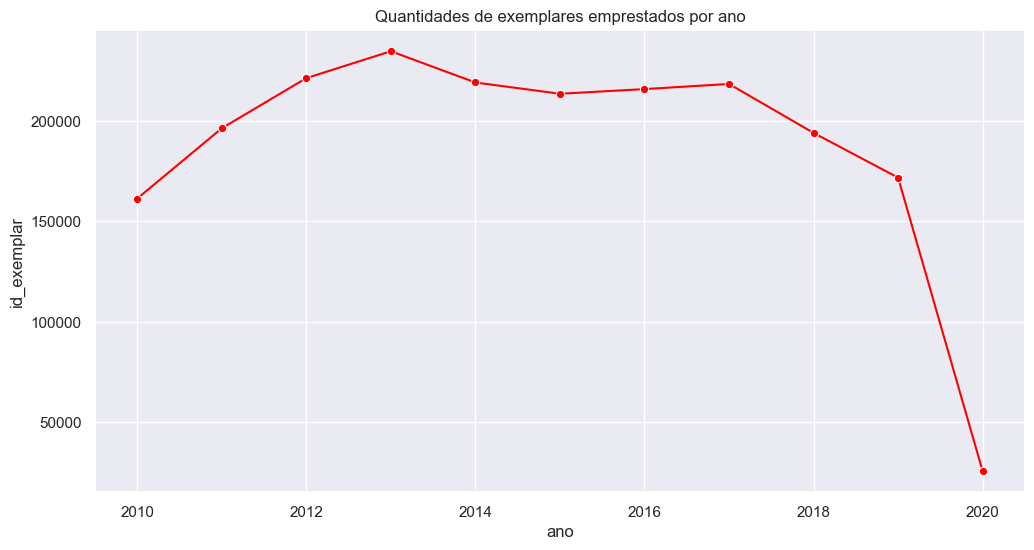

In [267]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df_ano, x='ano', y='id_exemplar', color='red',marker='o').set_title('Quantidades de exemplares emprestados por ano')

In [268]:
resultado_mes = quantidade_emprestimos.groupby(['mes','nome_mes'])['id_exemplar'].count().reset_index()
print(resultado_mes)

    mes   nome_mes  id_exemplar
0     1    January        67514
1     2   February       210200
2     3      March       252185
3     4      April       208725
4     5        May       202530
5     6       June       138123
6     7       July       123790
7     8     August       232793
8     9  September       208234
9    10    October       188410
10   11   November       164222
11   12   December        75796


In [269]:
df_mes = pd.DataFrame(resultado_mes, columns = ['mes', 'nome_mes','id_exemplar'])
df_mes.head()

,mes,nome_mes,id_exemplar
0,1,January,67514
1,2,February,210200
2,3,March,252185
3,4,April,208725
4,5,May,202530


Text(0.5, 1.0, 'Quantidades de exemplares emprestados por mês')

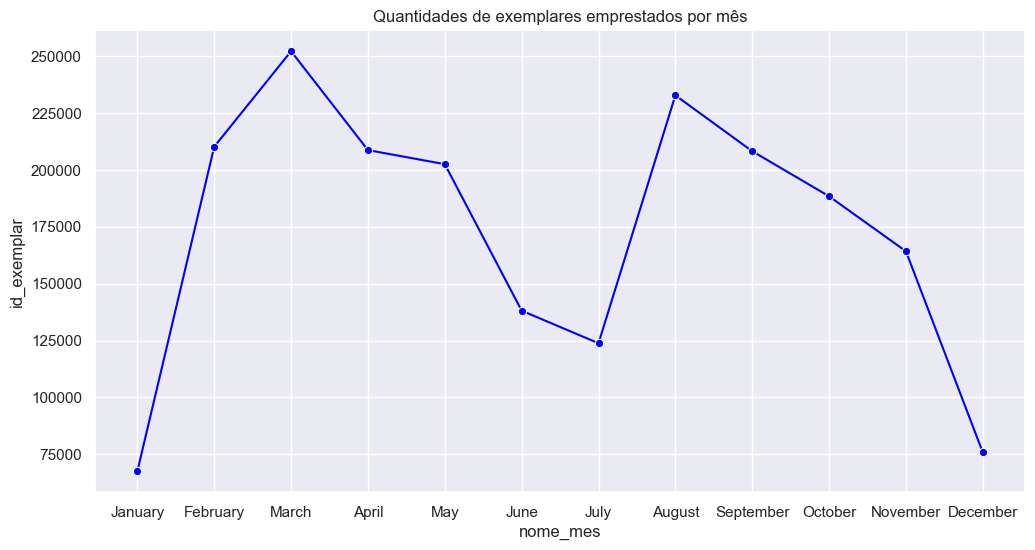

In [270]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
sns.lineplot(data=df_mes, x='nome_mes', y='id_exemplar', color='blue',marker='o').set_title('Quantidades de exemplares emprestados por mês')

In [271]:
resultado_horas = quantidade_emprestimos.groupby(['hora'])['id_exemplar'].count().reset_index()
print(resultado_horas)

    hora  id_exemplar
0      0           17
1      6           14
2      7        18777
3      8       103416
4      9       131273
5     10       185839
6     11       180048
7     12       148754
8     13       126987
9     14       150876
10    15       166672
11    16       210655
12    17       185340
13    18       182520
14    19       102129
15    20       127716
16    21        51191
17    22          247
18    23           51


In [272]:
df_horas = pd.DataFrame(resultado_horas, columns = ['hora','id_exemplar'])
df_horas.head()

,hora,id_exemplar
0,0,17
1,6,14
2,7,18777
3,8,103416
4,9,131273


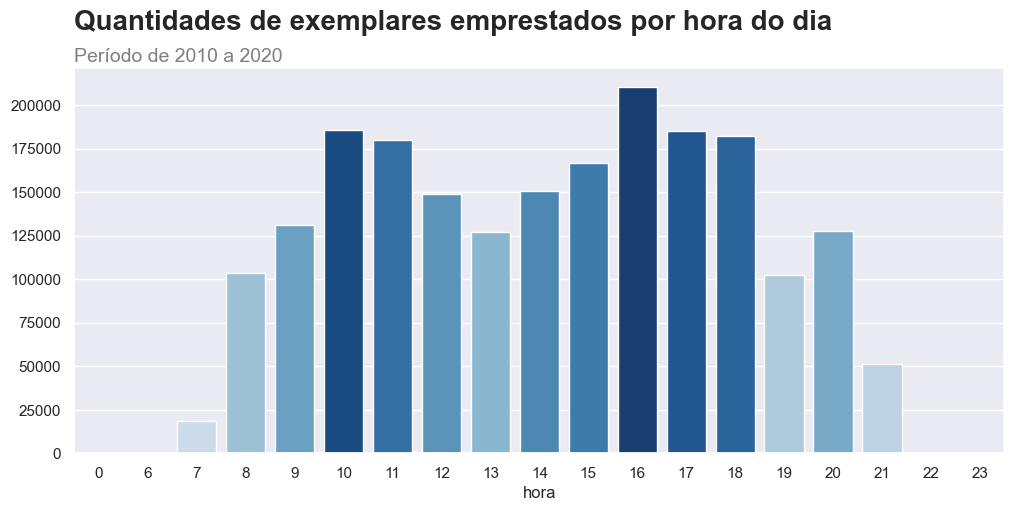

In [273]:
ax = sns.barplot(data=df_horas, x='hora', y='id_exemplar', palette='Blues', hue = 'id_exemplar', dodge = False)
plt.legend([],[], frameon=False)
ax.set(xlabel='hora',ylabel=None)
ax.set_title('Quantidades de exemplares emprestados por hora do dia'+"\n",size=20,loc='left',weight='bold')
ax.text(s='Período de 2010 a 2020',x=-0.5,y=225000,fontsize=14, ha='left',color='gray')
ax.figure.set_size_inches(12, 5)

DIA 4

In [274]:
df.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classificacao
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas.
2,726965,L095049,2010-03-31 12:41:08.684,2010-03-01 12:40:56.212,2010-04-30 14:42:35.366,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas.
3,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.
5,717763,L167050,NaT,2010-02-11 11:16:30.335,2010-03-04 08:54:32.262,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.
6,729996,L167050,2010-03-17 09:08:26.874,2010-03-04 13:36:26.599,2010-03-31 18:04:29.669,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.


In [275]:
def calcula_porcentagem(df, valor):
    if valor != 0:
        df['porcentagem'] = round((df[valor] / df[valor].sum()) * 100, ndigits=2)
    else:
        return 'valor não encontrado'

In [276]:
freq_tipo_vinculo = df.groupby(['tipo_vinculo_usuario'])['id_emprestimo'].count().reset_index()


In [277]:
calcula_porcentagem(freq_tipo_vinculo, ['id_emprestimo'])
freq_tipo_vinculo

,tipo_vinculo_usuario,id_emprestimo,porcentagem
0,ALUNO DE GRADUAÇÃO,1612324,77.80
1,ALUNO DE PÓS-GRADUAÇÃO,302541,14.60
2,ALUNO MÉDIO/TÉCNICO,28029,1.35
3,DOCENTE,70981,3.42
4,DOCENTE EXTERNO,23949,1.16
5,OUTROS,5,0.00
6,SERVIDOR TÉCNICO-ADMINISTRATIVO,32184,1.55
7,USUÁRIO EXTERNO,2509,0.12


In [278]:
freq_colecao = df.groupby(['colecao'])['id_emprestimo'].count().reset_index()

In [279]:
calcula_porcentagem(freq_colecao, ['id_emprestimo'])
freq_colecao

,colecao,id_emprestimo,porcentagem
0,Acervo Circulante,2053120,99.06
1,Coleção Mossoroense,44,0.00
2,Coleção Zila Mamede,30,0.00
3,Dissertações,2406,0.12
4,Eventos,101,0.00
5,Folhetos,271,0.01
6,Literatura de Cordel,24,0.00
7,Monografias,4021,0.19
8,Multimeios,7954,0.38
9,Necessidades Educacionais Específicas,130,0.01


In [280]:
freq_emprestimos_bibliotecas = df.groupby(['biblioteca'])['id_emprestimo'].count().reset_index()

In [281]:
calcula_porcentagem(freq_emprestimos_bibliotecas, ['id_emprestimo'])
freq_emprestimos_bibliotecas

,biblioteca,id_emprestimo,porcentagem
0,Biblioteca Central Zila Mamede,1426122,68.81
1,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,46040,2.22
2,Biblioteca Setorial Dr. Paulo Bezerra - EMCM/R...,32097,1.55
3,Biblioteca Setorial Moacyr de Góes - CE,1036,0.05
4,Biblioteca Setorial Pe. Jaime Diniz - Escola d...,21476,1.04
5,Biblioteca Setorial Prof. Alberto Moreira Camp...,66447,3.21
6,Biblioteca Setorial Prof. Dr. Marcelo Bezerra ...,5057,0.24
7,Biblioteca Setorial Prof. Francisco Gurgel De ...,26923,1.30
8,Biblioteca Setorial Prof. Horácio Nicolas Soli...,4098,0.20
9,Biblioteca Setorial Prof. Leopoldo Nelson - ­C...,12900,0.62


In [282]:
freq_emprestimos_classificacao = df.groupby(['classificacao'])['id_emprestimo'].count().reset_index()

In [283]:
calcula_porcentagem(freq_emprestimos_classificacao, ['id_emprestimo'])
freq_emprestimos_classificacao

,classificacao,id_emprestimo,porcentagem
0,Belas artes.,7911,0.38
1,Ciências aplicadas.,1425473,68.78
2,Ciências sociais.,369536,17.83
3,Filosofia e psicologia.,60563,2.92
4,Generalidades. Ciência e conhecimento.,62521,3.02
5,Geografia. Biografia. História.,7989,0.39
6,Linguagem. Língua. Linguística.,7490,0.36
7,Matemática e ciências naturais.,68744,3.32
8,Religião.,62295,3.01


DIA 5

In [284]:
df['ano'] = df['data_emprestimo'].dt.year
df['mes'] = df['data_emprestimo'].dt.month


In [285]:
verifica_colecao_1 = df.loc[(df['tipo_vinculo_usuario'] == 'ALUNO DE GRADUAÇÃO')]
verifica_colecao_1.value_counts(['colecao'])


colecao                              
Acervo Circulante                        1600155
Multimeios                                  4652
Monografias                                 3572
Dissertações                                1152
Obras de Referência                         1047
Publicações de Autores do RN                 595
Publicações da UFRN                          466
Teses                                        245
Folhetos                                     180
Trabalho Acadêmico                            81
Necessidades Educacionais Específicas         73
Eventos                                       57
Coleção Mossoroense                           17
Coleção Zila Mamede                           15
Literatura de Cordel                          11
Obras Raras                                    6
Name: count, dtype: int64

In [286]:
filtrados_graduacao = df.loc[(df['tipo_vinculo_usuario'] == 'ALUNO DE GRADUAÇÃO') & 
                             (df['colecao'] == 'Acervo Circulante')]
filtrados_graduacao.head()


,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classificacao,ano,mes
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas.,2010,1
3,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.,2010,1
5,717763,L167050,NaT,2010-02-11 11:16:30.335,2010-03-04 08:54:32.262,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.,2010,2
6,729996,L167050,2010-03-17 09:08:26.874,2010-03-04 13:36:26.599,2010-03-31 18:04:29.669,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.,2010,3
7,750168,L167050,2010-04-20 08:40:47.151,2010-04-06 09:43:02.740,2010-05-05 18:33:53.974,200719882.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.,2010,4


In [287]:
plot_graduacao = filtrados_graduacao.groupby(['ano'])['mes'].value_counts().reset_index()
plot_graduacao


,ano,mes,count
0,2010,3,15275
1,2010,9,14763
2,2010,8,14672
3,2010,4,12430
4,2010,10,12283
...,...,...,...
118,2019,1,2276
119,2019,12,1980
120,2020,3,8685
121,2020,2,8138


In [288]:
def cria_boxplots(df, titulo, subtitulo):
    sns.set_theme(style="darkgrid", palette='Blues',font_scale=1.3)                    
    plt.figure(figsize=(16,6)) 
    ax = sns.boxplot(y= 'count', x= 'ano', data= df,color='#4171EF')
    plt.ylim(0,max(df['count'])*1.1)                                               
    plt.xlabel(None)                                                                     
    plt.ylabel(None)
    ax.set_title(titulo+"\n",size=20,loc='left',weight='bold')
    ax.text(s=subtitulo,x=-0.5,y=max(df['count'])*1.11,fontsize=15, ha='left',color='gray')  

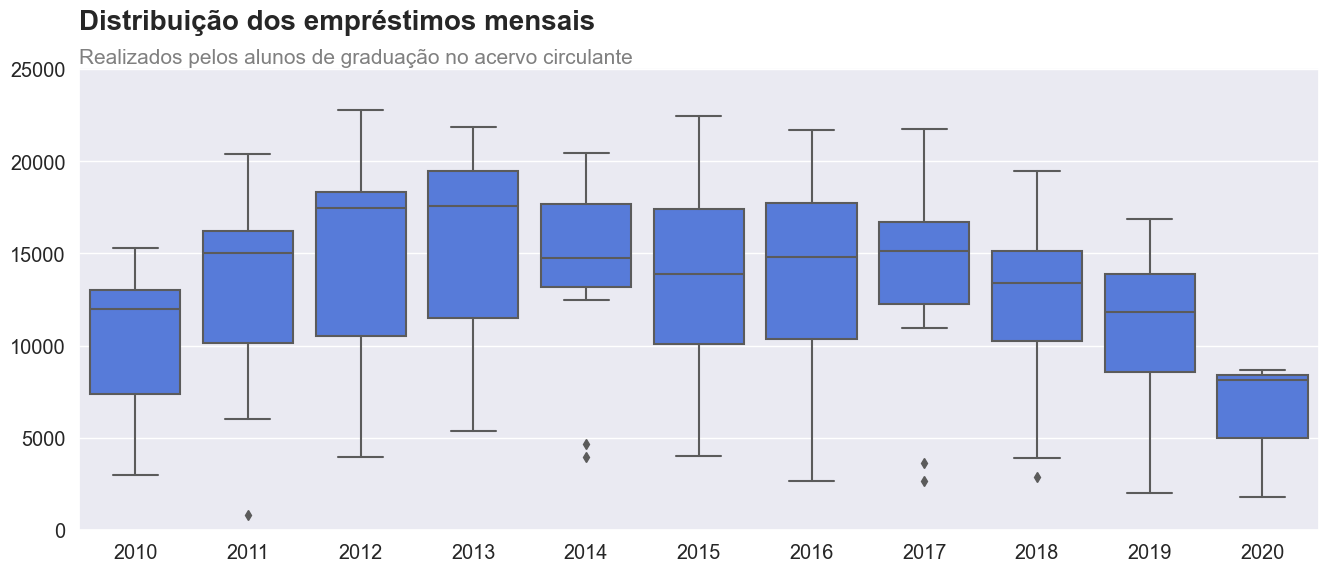

In [289]:
cria_boxplots(plot_graduacao, 'Distribuição dos empréstimos mensais', 'Realizados pelos alunos de graduação no acervo circulante')

In [290]:
verifica_colecao_2 = df.loc[(df['tipo_vinculo_usuario'] == 'ALUNO DE PÓS-GRADUAÇÃO')]
verifica_colecao_2.value_counts(['colecao'])

colecao                              
Acervo Circulante                        299201
Dissertações                                934
Obras de Referência                         700
Multimeios                                  559
Teses                                       367
Monografias                                 278
Publicações de Autores do RN                204
Publicações da UFRN                         121
Folhetos                                     60
Necessidades Educacionais Específicas        30
Eventos                                      26
Coleção Mossoroense                          23
Trabalho Acadêmico                           23
Coleção Zila Mamede                          11
Literatura de Cordel                          4
Name: count, dtype: int64

In [291]:
filtrados_pos_graduacao = df.loc[(df['tipo_vinculo_usuario'] == 'ALUNO DE PÓS-GRADUAÇÃO') & 
                                 (df['colecao'] == 'Acervo Circulante')]
filtrados_pos_graduacao.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classificacao,ano,mes
2,726965,L095049,2010-03-31 12:41:08.684,2010-03-01 12:40:56.212,2010-04-30 14:42:35.366,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas.,2010,3
10,785791,L167050,NaT,2010-06-01 18:41:54.885,2010-07-01 21:19:58.000,2009102346.0,ALUNO DE PÓS-GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.,2010,6
17,880244,L167050,NaT,2010-11-26 19:33:16.188,2010-12-14 18:52:15.000,2014124667.0,ALUNO DE PÓS-GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.,2010,11
24,1041880,L167050,2011-08-21 11:47:13.866,2011-08-08 12:40:38.355,2011-09-05 11:06:34.000,2015102280.0,ALUNO DE PÓS-GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.,2011,8
26,1082240,L167050,2011-10-20 08:58:05.351,2011-09-20 11:44:21.892,2011-11-22 16:36:13.000,2010120605.0,ALUNO DE PÓS-GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.,2011,9


In [292]:
plot_pos_graduacao = filtrados_pos_graduacao.groupby(['ano'])['mes'].value_counts().reset_index()
plot_pos_graduacao


,ano,mes,count
0,2010,3,2919
1,2010,4,2716
2,2010,5,2514
3,2010,9,2297
4,2010,8,2222
...,...,...,...
119,2019,12,1069
120,2020,3,1471
121,2020,2,1189
122,2020,1,1143


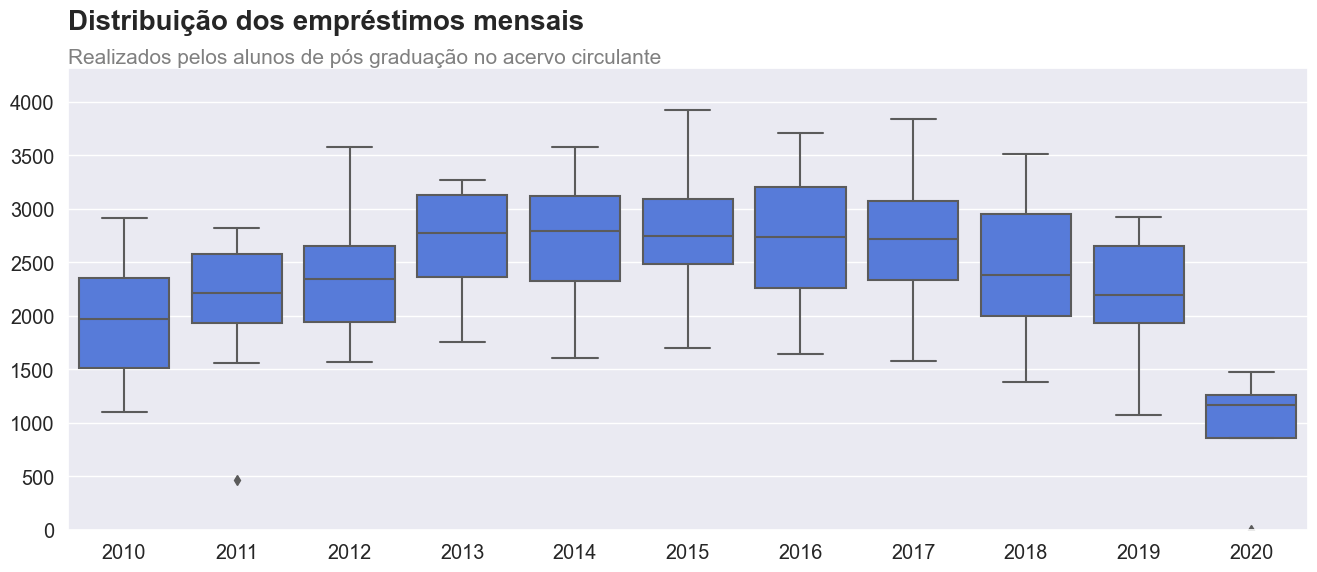

In [293]:
cria_boxplots(plot_pos_graduacao, 'Distribuição dos empréstimos mensais', 'Realizados pelos alunos de pós graduação no acervo circulante')

DIA 6

In [294]:
df_excel1 = pd.read_excel(r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\matricula_alunos.xlsx', 
                          header=1, 
                          sheet_name='Até 2010')
df_excel1.head()

,Número da matrícula,Tipo de vinculo,Curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA


In [295]:
df_excel2 = pd.read_excel(r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\matricula_alunos.xlsx',
                           header=1, 
                           sheet_name='Após 2010')
df_excel2

,Matricula,Tipo de vinculo,Cursos
0,2.010000e+09,ALUNO DE GRADUAÇÃO,DIREITO
1,2.010000e+09,ALUNO DE GRADUAÇÃO,AGRONOMIA
2,2.010001e+09,ALUNO DE GRADUAÇÃO,ENGENHARIA QUÍMICA
3,2.010003e+09,ALUNO DE GRADUAÇÃO,ENGENHARIA AMBIENTAL
4,2.010003e+09,ALUNO DE GRADUAÇÃO,GEOGRAFIA
...,...,...,...
2269,2.015012e+10,ALUNO DE GRADUAÇÃO,LETRAS
2270,2.015075e+09,ALUNO DE GRADUAÇÃO,DANÇA
2271,2.016000e+10,ALUNO DE GRADUAÇÃO,ENGENHARIA DA COMPUTAÇÃO
2272,2.017009e+10,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [296]:
df_excel2 = df_excel2.rename(columns= {'Matricula ' : 'Número da matrícula', 'Cursos' : 'Curso'})
df_excel2.head()

,Número da matrícula,Tipo de vinculo,Curso
0,2.010000e+09,ALUNO DE GRADUAÇÃO,DIREITO
1,2.010000e+09,ALUNO DE GRADUAÇÃO,AGRONOMIA
2,2.010001e+09,ALUNO DE GRADUAÇÃO,ENGENHARIA QUÍMICA
3,2.010003e+09,ALUNO DE GRADUAÇÃO,ENGENHARIA AMBIENTAL
4,2.010003e+09,ALUNO DE GRADUAÇÃO,GEOGRAFIA


In [297]:
df_excel2['Número da matrícula'] = df_excel2['Número da matrícula'].astype('string')
df_excel2.head()

,Número da matrícula,Tipo de vinculo,Curso
0,2010000017.0,ALUNO DE GRADUAÇÃO,DIREITO
1,2010000035.0,ALUNO DE GRADUAÇÃO,AGRONOMIA
2,2010001290.0,ALUNO DE GRADUAÇÃO,ENGENHARIA QUÍMICA
3,2010002849.0,ALUNO DE GRADUAÇÃO,ENGENHARIA AMBIENTAL
4,2010003381.0,ALUNO DE GRADUAÇÃO,GEOGRAFIA


In [298]:
df_excel = pd.concat([df_excel1,df_excel2], axis=0)
df_excel.head()

,Número da matrícula,Tipo de vinculo,Curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA


In [299]:
arquivo_json = pd.read_json(r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\arquivojson.txt')

In [300]:
arquivo_json

,tipo_curso,registros
0,GRADUACAO,"[{""matricula_ou_siape"": ""2009029003.0"", ""tipo_..."
1,POSGRADUACAO,"[{""matricula_ou_siape"": ""2008112114.0"", ""tipo_..."


In [301]:
arquivo_1_json = pd.read_json(arquivo_json.registros[0])
arquivo_1_json

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2009029003,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,200617346,ALUNO DE GRADUAÇÃO,DIREITO
2,200746502,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
3,200504968,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
4,200615572,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO
...,...,...,...
62797,20200012706,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
62798,20200039601,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
62799,20200132517,ALUNO DE GRADUAÇÃO,AGRONOMIA
62800,20200009344,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [302]:
arquivo_1_json['matricula_ou_siape'] = arquivo_1_json['matricula_ou_siape'].astype('float')
arquivo_1_json['matricula_ou_siape'] = arquivo_1_json['matricula_ou_siape'].astype('string')
arquivo_1_json.head()

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2009029003.0,ALUNO DE GRADUAÇÃO,FILOSOFIA
1,200617346.0,ALUNO DE GRADUAÇÃO,DIREITO
2,200746502.0,ALUNO DE GRADUAÇÃO,ENGENHARIA DE PETRÓLEO
3,200504968.0,ALUNO DE GRADUAÇÃO,ADMINISTRAÇÃO
4,200615572.0,ALUNO DE GRADUAÇÃO,CIÊNCIA DA COMPUTAÇÃO


In [303]:
arquivo_1_json = arquivo_1_json.rename(columns= {'matricula_ou_siape' : 'Número da matrícula',
                                                  'tipo_vinculo_usuario' : 'Tipo de vinculo' ,
                                                  'curso' : 'Curso'})


In [304]:
cadastro_usuarios_cursos = pd.concat([df_excel,arquivo_1_json], axis=0, ignore_index=True)

In [305]:
cadastro_usuarios_cursos = cadastro_usuarios_cursos.rename(columns= {'Número da matrícula':'matricula_ou_siape' ,
                                                                      'Tipo de vinculo' : 'tipo_vinculo_usuario' ,
                                                                      'Curso' : 'curso'})


In [306]:
cadastro_usuarios_cursos

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
72797,20200012706.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
72798,20200039601.0,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
72799,20200132517.0,ALUNO DE GRADUAÇÃO,AGRONOMIA
72800,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [307]:
quantidade_emprestimos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classificacao,ano,mes,nome_mes,hora
0,709684,L095049,NaT,2010-01-04 07:44:10.721,2010-01-05 16:26:12.662,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas.,2010,1,January,7
2,726965,L095049,2010-03-31 12:41:08.684,2010-03-01 12:40:56.212,2010-04-30 14:42:35.366,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas.,2010,3,March,12
3,709685,L167050,NaT,2010-01-04 07:44:10.750,2010-01-12 07:34:13.934,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.,2010,1,January,7
5,717763,L167050,NaT,2010-02-11 11:16:30.335,2010-03-04 08:54:32.262,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.,2010,2,February,11
6,729996,L167050,2010-03-17 09:08:26.874,2010-03-04 13:36:26.599,2010-03-31 18:04:29.669,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas.,2010,3,March,13


In [308]:
quantidade_emprestimos_2 = quantidade_emprestimos[['matricula_ou_siape', 'ano']]
quantidade_emprestimos_2

,matricula_ou_siape,ano
0,2008023265.0,2010
2,2009121584.0,2010
3,2008023265.0,2010
5,2008050352.0,2010
6,200722565.0,2010
...,...,...
2072553,20150109837.0,2020
2072554,20190035012.0,2020
2072555,20191021693.0,2020
2072556,20150129867.0,2020


In [309]:
quantidade_emprestimos_2 = quantidade_emprestimos_2.rename(columns= {'matricula_ou_siape' : 'matricula_ou_siape'})

In [310]:
union_dataframes = pd.merge(cadastro_usuarios_cursos, quantidade_emprestimos_2, on='matricula_ou_siape')
union_dataframes

,matricula_ou_siape,tipo_vinculo_usuario,curso,ano
0,2010000017.0,ALUNO DE GRADUAÇÃO,DIREITO,2011
1,2010000017.0,ALUNO DE GRADUAÇÃO,DIREITO,2011
2,2010000017.0,ALUNO DE GRADUAÇÃO,DIREITO,2013
3,2010000017.0,ALUNO DE GRADUAÇÃO,DIREITO,2011
4,2010000017.0,ALUNO DE GRADUAÇÃO,DIREITO,2013
...,...,...,...,...
1400635,20200039601.0,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL,2020
1400636,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA,2020
1400637,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA,2020
1400638,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA,2020


In [311]:
cursos_utilizados = ['BIBLIOTECONOMIA','CIÊNCIAS SOCIAIS', 'COMUNICAÇÃO SOCIAL', 'DIREITO', 'FILOSOFIA', 'PEDAGOGIA']

union_dataframes_filtered = union_dataframes.loc[(union_dataframes['ano'] >= 2015) & 
                                                 (union_dataframes['curso'].isin(cursos_utilizados))]
union_dataframes_filtered

,matricula_ou_siape,tipo_vinculo_usuario,curso,ano
717,2010012887.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA,2015
745,2010012887.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA,2015
746,2010012887.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA,2015
749,2010012887.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA,2015
758,2010012887.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA,2015
...,...,...,...,...
1400634,20200012706.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA,2020
1400636,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA,2020
1400637,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA,2020
1400638,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA,2020


In [312]:
union_dataframes_tabel = union_dataframes_filtered.groupby(['curso'])['ano'].value_counts().reset_index()
union_dataframes_tabel.head()

,curso,ano,count
0,BIBLIOTECONOMIA,2015,7716
1,BIBLIOTECONOMIA,2017,7298
2,BIBLIOTECONOMIA,2016,7031
3,BIBLIOTECONOMIA,2018,6378
4,BIBLIOTECONOMIA,2019,5889


In [313]:
table = pd.pivot_table(union_dataframes_tabel, index = 'curso', columns = 'ano', values = 'count', margins = True, margins_name='total', aggfunc=sum)
table

ano,2015,2016,2017,2018,2019,2020,total
curso,,,,,,,
BIBLIOTECONOMIA,7716,7031,7298,6378,5889,900,35212
CIÊNCIAS SOCIAIS,7370,6963,6906,6181,5788,825,34033
COMUNICAÇÃO SOCIAL,7057,7966,8251,6953,5885,796,36908
DIREITO,7580,7344,7880,7027,5861,905,36597
FILOSOFIA,6950,7576,7389,6296,5572,832,34615
PEDAGOGIA,7189,7153,7434,6518,5869,866,35029
total,43862,44033,45158,39353,34864,5124,212394


DIA 7

In [314]:
arquivo_2_json = pd.read_json(arquivo_json.registros[1])
arquivo_2_json

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2008112114,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS
1,2008106583,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA DE SOFTWARE
2,2011101417,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
3,2011113122,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,2010110903,ALUNO DE PÓS-GRADUAÇÃO,ARTES CÊNICAS
...,...,...,...
19435,20201013501,ALUNO DE PÓS-GRADUAÇÃO,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
19436,20201014062,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
19437,20201017690,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE
19438,20201014465,ALUNO DE PÓS-GRADUAÇÃO,DESIGN


In [315]:
arquivo_2_json['matricula_ou_siape'] = arquivo_2_json['matricula_ou_siape'].astype('float')
arquivo_2_json['matricula_ou_siape'] = arquivo_2_json['matricula_ou_siape'].astype('string')
arquivo_2_json.head()

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS
1,2008106583.0,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA DE SOFTWARE
2,2011101417.0,ALUNO DE PÓS-GRADUAÇÃO,ARQUITETURA E URBANISMO
3,2011113122.0,ALUNO DE PÓS-GRADUAÇÃO,FILOSOFIA
4,2010110903.0,ALUNO DE PÓS-GRADUAÇÃO,ARTES CÊNICAS


In [316]:
union_dataframes_2 = pd.merge(arquivo_2_json, quantidade_emprestimos_2, on='matricula_ou_siape')
union_dataframes_2

,matricula_ou_siape,tipo_vinculo_usuario,curso,ano
0,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS,2010
1,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS,2012
2,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS,2010
3,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS,2011
4,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS ODONTOLÓGICAS,2010
...,...,...,...,...
302398,20201017690.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE,2020
302399,20201017690.0,ALUNO DE PÓS-GRADUAÇÃO,CIÊNCIAS DA SAÚDE,2020
302400,20201014465.0,ALUNO DE PÓS-GRADUAÇÃO,DESIGN,2020
302401,20201014993.0,ALUNO DE PÓS-GRADUAÇÃO,DESIGN,2020


In [317]:
union_dataframes_2 = union_dataframes_2.loc[(union_dataframes_2['ano'] >= 2017) & 
                                            (union_dataframes_2['ano'] < 2020)]
union_dataframes_2

,matricula_ou_siape,tipo_vinculo_usuario,curso,ano
2053,2013103949.0,ALUNO DE PÓS-GRADUAÇÃO,BIOINFORMÁTICA,2017
2100,2013103949.0,ALUNO DE PÓS-GRADUAÇÃO,BIOINFORMÁTICA,2017
2105,2013103949.0,ALUNO DE PÓS-GRADUAÇÃO,BIOINFORMÁTICA,2017
2107,2013103949.0,ALUNO DE PÓS-GRADUAÇÃO,BIOINFORMÁTICA,2017
2109,2013103949.0,ALUNO DE PÓS-GRADUAÇÃO,BIOINFORMÁTICA,2017
...,...,...,...,...
301526,20192013758.0,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2019
301527,20192013758.0,ALUNO DE PÓS-GRADUAÇÃO,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2019
301528,20191016192.0,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA DE SOFTWARE,2019
301529,20191016192.0,ALUNO DE PÓS-GRADUAÇÃO,ENGENHARIA DE SOFTWARE,2019


In [318]:
union_dataframes_count = union_dataframes_2.groupby(['curso'])['ano'].value_counts().reset_index()
union_dataframes_count

,curso,ano,count
0,ADMINISTRAÇÃO,2017,2538
1,ADMINISTRAÇÃO,2018,2316
2,ADMINISTRAÇÃO,2019,1692
3,ARQUITETURA E URBANISMO,2017,2209
4,ARQUITETURA E URBANISMO,2018,1917
5,ARQUITETURA E URBANISMO,2019,1818
6,ARTES CÊNICAS,2017,2115
7,ARTES CÊNICAS,2018,2082
8,ARTES CÊNICAS,2019,1812
9,BIOINFORMÁTICA,2017,2190


In [319]:
pd_previsao = pd.read_table(r'C:\Users\joao.batista\Desktop\7_days_of_code_alura\datasets\previsao.txt')
pd_previsao

,curso previsao_2022
0,administracao 1905
1,arquitetura_e_urbanismo 1896
2,artes_cenicas 1920
3,bioinformatica 2302
4,bioquimica 2090
5,ciencia_e_engenharia_de_materiais 2010
6,ciencia_tecnologia_e_inovacao 1960
7,ciencias_da_saude 1730
8,ciencias_odontologicas 2405
9,design 1900


In [320]:
pd_previsao[['curso', '2022']] = pd_previsao['curso previsao_2022'].str.split(' ', expand=True)
pd_previsao

,curso previsao_2022,curso,2022
0,administracao 1905,administracao,1905
1,arquitetura_e_urbanismo 1896,arquitetura_e_urbanismo,1896
2,artes_cenicas 1920,artes_cenicas,1920
3,bioinformatica 2302,bioinformatica,2302
4,bioquimica 2090,bioquimica,2090
5,ciencia_e_engenharia_de_materiais 2010,ciencia_e_engenharia_de_materiais,2010
6,ciencia_tecnologia_e_inovacao 1960,ciencia_tecnologia_e_inovacao,1960
7,ciencias_da_saude 1730,ciencias_da_saude,1730
8,ciencias_odontologicas 2405,ciencias_odontologicas,2405
9,design 1900,design,1900


In [321]:
pd_previsao = pd_previsao.drop('curso previsao_2022', axis=1)
pd_previsao

,curso,2022
0,administracao,1905
1,arquitetura_e_urbanismo,1896
2,artes_cenicas,1920
3,bioinformatica,2302
4,bioquimica,2090
5,ciencia_e_engenharia_de_materiais,2010
6,ciencia_tecnologia_e_inovacao,1960
7,ciencias_da_saude,1730
8,ciencias_odontologicas,2405
9,design,1900


In [322]:
pd_previsao['curso'] = pd_previsao['curso'].str.replace('_', ' ')

In [323]:
pd_previsao

,curso,2022
0,administracao,1905
1,arquitetura e urbanismo,1896
2,artes cenicas,1920
3,bioinformatica,2302
4,bioquimica,2090
5,ciencia e engenharia de materiais,2010
6,ciencia tecnologia e inovacao,1960
7,ciencias da saude,1730
8,ciencias odontologicas,2405
9,design,1900


In [324]:
d = {  'administracao' : 'ADMINISTRAÇÃO',
        'arquitetura e urbanismo' : 'ARQUITETURA E URBANISMO',
        'artes cenicas' : 'ARTES CÊNICAS',
        'bioinformatica' : 'BIOINFORMÁTICA',
        'bioquimica' : 'BIOQUÍMICA',
        'ciencia e engenharia de materiais' : 'CIÊNCIA E ENGENHARIA DE MATERIAIS',
        'ciencia tecnologia e inovacao' : 'CIÊNCIA, TECNOLOGIA E INOVAÇÃO',
        'ciencias da saude' : 'CIÊNCIAS DA SAÚDE',
        'ciencias odontologicas' : 'CIÊNCIAS ODONTOLÓGICAS',
        'design' : 'DESIGN',
        'engenharia civil': 'ENGENHARIA CIVIL',
        'engenharia software' : 'ENGENHARIA DE SOFTWARE',
        'filosofia' : 'FILOSOFIA',
        'gestao da informacao e do conhecimento' :  'GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO'
} 

In [325]:
pd_previsao['curso'] = pd_previsao['curso'].map(d)

In [326]:
pd_previsao

,curso,2022
0,ADMINISTRAÇÃO,1905
1,ARQUITETURA E URBANISMO,1896
2,ARTES CÊNICAS,1920
3,BIOINFORMÁTICA,2302
4,BIOQUÍMICA,2090
5,CIÊNCIA E ENGENHARIA DE MATERIAIS,2010
6,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",1960
7,CIÊNCIAS DA SAÚDE,1730
8,CIÊNCIAS ODONTOLÓGICAS,2405
9,DESIGN,1900


In [327]:
pd_previsao = pd_previsao.rename(columns= {'2022' : 'count'})

In [328]:
pd_previsao['ano'] = 2022
pd_previsao

,curso,count,ano
0,ADMINISTRAÇÃO,1905,2022
1,ARQUITETURA E URBANISMO,1896,2022
2,ARTES CÊNICAS,1920,2022
3,BIOINFORMÁTICA,2302,2022
4,BIOQUÍMICA,2090,2022
5,CIÊNCIA E ENGENHARIA DE MATERIAIS,2010,2022
6,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",1960,2022
7,CIÊNCIAS DA SAÚDE,1730,2022
8,CIÊNCIAS ODONTOLÓGICAS,2405,2022
9,DESIGN,1900,2022


In [329]:
pd_previsao = pd_previsao[['curso', 'ano', 'count']]
pd_previsao

,curso,ano,count
0,ADMINISTRAÇÃO,2022,1905
1,ARQUITETURA E URBANISMO,2022,1896
2,ARTES CÊNICAS,2022,1920
3,BIOINFORMÁTICA,2022,2302
4,BIOQUÍMICA,2022,2090
5,CIÊNCIA E ENGENHARIA DE MATERIAIS,2022,2010
6,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2022,1960
7,CIÊNCIAS DA SAÚDE,2022,1730
8,CIÊNCIAS ODONTOLÓGICAS,2022,2405
9,DESIGN,2022,1900


In [330]:
pd_previsao['count'] = pd_previsao['count'].astype(int)

In [331]:
union_tables = pd.concat([union_dataframes_count, pd_previsao], ignore_index=True)
union_tables.head()

,curso,ano,count
0,ADMINISTRAÇÃO,2017,2538
1,ADMINISTRAÇÃO,2018,2316
2,ADMINISTRAÇÃO,2019,1692
3,ARQUITETURA E URBANISMO,2017,2209
4,ARQUITETURA E URBANISMO,2018,1917


In [332]:
union_tables = union_tables.sort_values(by=['curso','ano'])
union_tables.head()

,curso,ano,count
0,ADMINISTRAÇÃO,2017,2538
1,ADMINISTRAÇÃO,2018,2316
2,ADMINISTRAÇÃO,2019,1692
42,ADMINISTRAÇÃO,2022,1905
3,ARQUITETURA E URBANISMO,2017,2209


In [333]:
table_1 = pd.pivot_table(union_tables, index = 'curso', columns = 'ano', values = 'count')
table_1

ano,2017,2018,2019,2022
curso,,,,
ADMINISTRAÇÃO,2538,2316,1692,1905
ARQUITETURA E URBANISMO,2209,1917,1818,1896
ARTES CÊNICAS,2115,2082,1812,1920
BIOINFORMÁTICA,2190,1914,1825,2302
BIOQUÍMICA,2294,1944,2057,2090
CIÊNCIA E ENGENHARIA DE MATERIAIS,2316,2110,2008,2010
"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415,2365,2026,1960
CIÊNCIAS DA SAÚDE,2434,1986,1825,1730
CIÊNCIAS ODONTOLÓGICAS,2414,2540,2134,2405


In [334]:
table_1 = table_1.reset_index()
table_1

ano,curso,2017,2018,2019,2022
0,ADMINISTRAÇÃO,2538,2316,1692,1905
1,ARQUITETURA E URBANISMO,2209,1917,1818,1896
2,ARTES CÊNICAS,2115,2082,1812,1920
3,BIOINFORMÁTICA,2190,1914,1825,2302
4,BIOQUÍMICA,2294,1944,2057,2090
5,CIÊNCIA E ENGENHARIA DE MATERIAIS,2316,2110,2008,2010
6,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",2415,2365,2026,1960
7,CIÊNCIAS DA SAÚDE,2434,1986,1825,1730
8,CIÊNCIAS ODONTOLÓGICAS,2414,2540,2134,2405
9,DESIGN,2272,1838,1841,1900


In [335]:
table_1.dtypes

ano
curso    object
2017      int64
2018      int64
2019      int64
2022      int64
dtype: object

In [336]:
def calcula_diferenca(x,y):
    return round(((x / y * 100) - 100),2)

In [337]:
percentual_2018 = calcula_diferenca(table_1.iloc[:,2],table_1.iloc[:,1])
percentual_2019 = calcula_diferenca(table_1.iloc[:,3],table_1.iloc[:,2])
percentual_2022 = calcula_diferenca(table_1.iloc[:,4],table_1.iloc[:,3])

In [338]:
percentual = pd.DataFrame({'curso': table_1['curso'],
                           '2018':percentual_2018,
                           '2019':percentual_2019,
                           '2022':percentual_2022})
percentual

,curso,2018,2019,2022
0,ADMINISTRAÇÃO,-8.75,-26.94,12.59
1,ARQUITETURA E URBANISMO,-13.22,-5.16,4.29
2,ARTES CÊNICAS,-1.56,-12.97,5.96
3,BIOINFORMÁTICA,-12.60,-4.65,26.14
4,BIOQUÍMICA,-15.26,5.81,1.60
5,CIÊNCIA E ENGENHARIA DE MATERIAIS,-8.89,-4.83,0.10
6,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",-2.07,-14.33,-3.26
7,CIÊNCIAS DA SAÚDE,-18.41,-8.11,-5.21
8,CIÊNCIAS ODONTOLÓGICAS,5.22,-15.98,12.70
9,DESIGN,-19.10,0.16,3.20


In [339]:
percentual.columns = percentual.columns.str.capitalize()
percentual

,Curso,2018,2019,2022
0,ADMINISTRAÇÃO,-8.75,-26.94,12.59
1,ARQUITETURA E URBANISMO,-13.22,-5.16,4.29
2,ARTES CÊNICAS,-1.56,-12.97,5.96
3,BIOINFORMÁTICA,-12.60,-4.65,26.14
4,BIOQUÍMICA,-15.26,5.81,1.60
5,CIÊNCIA E ENGENHARIA DE MATERIAIS,-8.89,-4.83,0.10
6,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",-2.07,-14.33,-3.26
7,CIÊNCIAS DA SAÚDE,-18.41,-8.11,-5.21
8,CIÊNCIAS ODONTOLÓGICAS,5.22,-15.98,12.70
9,DESIGN,-19.10,0.16,3.20


In [340]:
percentual['Curso'] = percentual['Curso'].str.capitalize()
percentual

,Curso,2018,2019,2022
0,Administração,-8.75,-26.94,12.59
1,Arquitetura e urbanismo,-13.22,-5.16,4.29
2,Artes cênicas,-1.56,-12.97,5.96
3,Bioinformática,-12.60,-4.65,26.14
4,Bioquímica,-15.26,5.81,1.60
5,Ciência e engenharia de materiais,-8.89,-4.83,0.10
6,"Ciência, tecnologia e inovação",-2.07,-14.33,-3.26
7,Ciências da saúde,-18.41,-8.11,-5.21
8,Ciências odontológicas,5.22,-15.98,12.70
9,Design,-19.10,0.16,3.20


In [341]:
percentual.dtypes

Curso     object
2018     float64
2019     float64
2022     float64
dtype: object

In [342]:
percentual['2018'] = percentual['2018'].astype(float)
percentual


,Curso,2018,2019,2022
0,Administração,-8.75,-26.94,12.59
1,Arquitetura e urbanismo,-13.22,-5.16,4.29
2,Artes cênicas,-1.56,-12.97,5.96
3,Bioinformática,-12.60,-4.65,26.14
4,Bioquímica,-15.26,5.81,1.60
5,Ciência e engenharia de materiais,-8.89,-4.83,0.10
6,"Ciência, tecnologia e inovação",-2.07,-14.33,-3.26
7,Ciências da saúde,-18.41,-8.11,-5.21
8,Ciências odontológicas,5.22,-15.98,12.70
9,Design,-19.10,0.16,3.20


In [343]:
percentual[['2018', '2019', '2022']] = percentual[['2018', '2019', '2022']].astype(str) + '%'
percentual

,Curso,2018,2019,2022
0,Administração,-8.75%,-26.94%,12.59%
1,Arquitetura e urbanismo,-13.22%,-5.16%,4.29%
2,Artes cênicas,-1.56%,-12.97%,5.96%
3,Bioinformática,-12.6%,-4.65%,26.14%
4,Bioquímica,-15.26%,5.81%,1.6%
5,Ciência e engenharia de materiais,-8.89%,-4.83%,0.1%
6,"Ciência, tecnologia e inovação",-2.07%,-14.33%,-3.26%
7,Ciências da saúde,-18.41%,-8.11%,-5.21%
8,Ciências odontológicas,5.22%,-15.98%,12.7%
9,Design,-19.1%,0.16%,3.2%


In [344]:
def colorir_valor(valor):
    if valor.startswith('-'):
        cor = 'color: red'
    else:
        cor = 'color: green'
    return f'{cor}'

In [345]:
percentual_style = percentual.style.applymap(colorir_valor, subset= percentual.columns.difference(['Curso']))


In [346]:
percentual_style

,Curso,2018,2019,2022
0,Administração,-8.75%,-26.94%,12.59%
1,Arquitetura e urbanismo,-13.22%,-5.16%,4.29%
2,Artes cênicas,-1.56%,-12.97%,5.96%
3,Bioinformática,-12.6%,-4.65%,26.14%
4,Bioquímica,-15.26%,5.81%,1.6%
5,Ciência e engenharia de materiais,-8.89%,-4.83%,0.1%
6,"Ciência, tecnologia e inovação",-2.07%,-14.33%,-3.26%
7,Ciências da saúde,-18.41%,-8.11%,-5.21%
8,Ciências odontológicas,5.22%,-15.98%,12.7%
9,Design,-19.1%,0.16%,3.2%


In [347]:
html = percentual_style.to_html()
print(html)

<style type="text/css">
#T_00c83_row0_col1, #T_00c83_row0_col2, #T_00c83_row1_col1, #T_00c83_row1_col2, #T_00c83_row2_col1, #T_00c83_row2_col2, #T_00c83_row3_col1, #T_00c83_row3_col2, #T_00c83_row4_col1, #T_00c83_row5_col1, #T_00c83_row5_col2, #T_00c83_row6_col1, #T_00c83_row6_col2, #T_00c83_row6_col3, #T_00c83_row7_col1, #T_00c83_row7_col2, #T_00c83_row7_col3, #T_00c83_row8_col2, #T_00c83_row9_col1, #T_00c83_row10_col1, #T_00c83_row10_col2, #T_00c83_row10_col3, #T_00c83_row11_col1, #T_00c83_row11_col2, #T_00c83_row12_col1, #T_00c83_row12_col2, #T_00c83_row13_col1, #T_00c83_row13_col2 {
  color: red;
}
#T_00c83_row0_col3, #T_00c83_row1_col3, #T_00c83_row2_col3, #T_00c83_row3_col3, #T_00c83_row4_col2, #T_00c83_row4_col3, #T_00c83_row5_col3, #T_00c83_row8_col1, #T_00c83_row8_col3, #T_00c83_row9_col2, #T_00c83_row9_col3, #T_00c83_row11_col3, #T_00c83_row12_col3, #T_00c83_row13_col3 {
  color: green;
}
</style>
<table id="T_00c83">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;<

In [348]:
text_file = open("index.html", "w")
text_file.write(html)
text_file.close()